In [1]:
import numpy as np
import matplotlib.pyplot as plt


Let's create some data:

In [2]:
#Pick a random number generator for reproducibility

rng = np.random.default_rng(666)

x = np.array([0.1,0.15,0.3,0.5,0.8,1.0])
y = 1.4*x + 0.3
y += 0.05*rng.standard_normal(6)

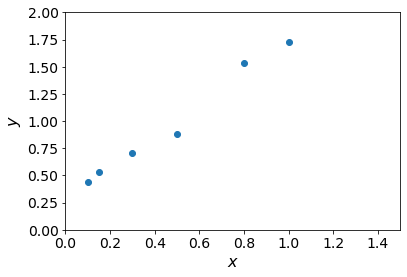

In [3]:

plt.scatter(x,y)

#formating
plt.xlim([0.0,1.5])
plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('lin_reg_data_1d.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

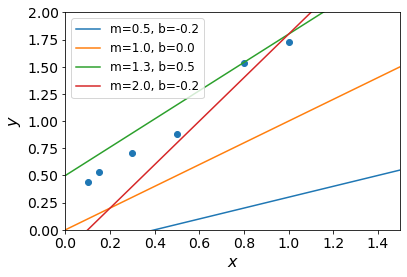

In [4]:
plt.scatter(x,y)
xrange = np.linspace(0,2,20)

plt.plot(xrange,0.5*xrange-0.2,label='m=0.5, b=-0.2')
plt.plot(xrange,1.0*xrange,label='m=1.0, b=0.0')
plt.plot(xrange,1.3*xrange+0.5,label='m=1.3, b=0.5')
plt.plot(xrange,2.0*xrange-0.2,label='m=2.0, b=-0.2')


#formating
plt.xlim([0.0,1.5])
plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

plt.savefig('lin_reg_data_1d_lines.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [5]:
def sse_loss(f_x,y):
    L = np.sum((f_x-y)**2)
    return L

In [8]:
m_range = np.linspace(0.5,2.0,5)
b_range = np.linspace(-0.5,0.5,5)
mm,bb   = np.meshgrid(m_range,b_range)

loss_grid = [] #sse_loss(mm*x+bb,y)

print("m\tb\tLoss")
for m in m_range:
    for b in b_range:
        L = sse_loss(m*x+b,y)
        print(f"{round(m,2)}\t{round(b,2)}\t{round(L,2)}")
        loss_grid.append(L)
loss_grid = np.array(loss_grid).reshape(5,5)
#print(loss_grid.shape)

m	b	Loss
0.5	-0.5	9.76
0.5	-0.25	6.43
0.5	0.0	3.86
0.5	0.25	2.04
0.5	0.5	0.96
0.88	-0.5	6.93
0.88	-0.25	4.14
0.88	0.0	2.1
0.88	0.25	0.81
0.88	0.5	0.27
1.25	-0.5	4.67
1.25	-0.25	2.41
1.25	0.0	0.91
1.25	0.25	0.15
1.25	0.5	0.15
1.62	-0.5	2.97
1.62	-0.25	1.25
1.62	0.0	0.28
1.62	0.25	0.06
1.62	0.5	0.59
2.0	-0.5	1.84
2.0	-0.25	0.65
2.0	0.0	0.22
2.0	0.25	0.53
2.0	0.5	1.59


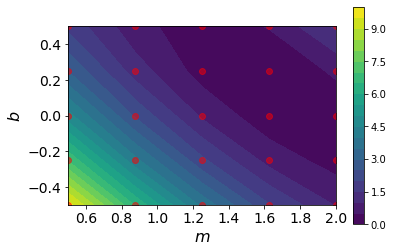

In [9]:

h = plt.contourf(mm, bb, loss_grid,levels=np.linspace(0.0,10,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
plt.colorbar()
plt.scatter(mm,bb,c='r',alpha=0.5)
plt.axis('scaled')

plt.xlabel('$m$',fontsize=16)
plt.ylabel('$b$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('lin_reg_gridsearch.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()


In [23]:
m_range = np.linspace(-0.5,0.5,5)
b_range = np.linspace(-0.5,0.5,5)
mm,bb   = np.meshgrid(m_range,b_range)

m_rand = np.random.random(25)-0.5
b_rand = np.random.random(25)-0.5

#Quasi Monte Carlo:

from scipy.stats import qmc
sampler = qmc.Sobol(d=2, scramble=False)
qmc_samps = sampler.random(2**5)-0.5
print(qmc_samps)

loss_grid = [] #sse_loss(mm*x+bb,y)

print("m\tb\tLoss")
for b in b_range:
    for m in m_range:
        L = (m-0.12)**2
        print(f"{round(m,2)}\t{round(b,2)}\t{round(L,2)}")
        loss_grid.append(L)
loss_grid = np.array(loss_grid).reshape(5,5)
#print(loss_grid.shape)

[[-0.5     -0.5    ]
 [ 0.       0.     ]
 [ 0.25    -0.25   ]
 [-0.25     0.25   ]
 [-0.125   -0.125  ]
 [ 0.375    0.375  ]
 [ 0.125   -0.375  ]
 [-0.375    0.125  ]
 [-0.3125  -0.1875 ]
 [ 0.1875   0.3125 ]
 [ 0.4375  -0.4375 ]
 [-0.0625   0.0625 ]
 [-0.1875  -0.3125 ]
 [ 0.3125   0.1875 ]
 [ 0.0625  -0.0625 ]
 [-0.4375   0.4375 ]
 [-0.40625 -0.03125]
 [ 0.09375  0.46875]
 [ 0.34375 -0.28125]
 [-0.15625  0.21875]
 [-0.03125 -0.40625]
 [ 0.46875  0.09375]
 [ 0.21875 -0.15625]
 [-0.28125  0.34375]
 [-0.34375 -0.34375]
 [ 0.15625  0.15625]
 [ 0.40625 -0.09375]
 [-0.09375  0.40625]
 [-0.21875 -0.21875]
 [ 0.28125  0.28125]
 [ 0.03125 -0.46875]
 [-0.46875  0.03125]]
m	b	Loss
-0.5	-0.5	0.38
-0.25	-0.5	0.14
0.0	-0.5	0.01
0.25	-0.5	0.02
0.5	-0.5	0.14
-0.5	-0.25	0.38
-0.25	-0.25	0.14
0.0	-0.25	0.01
0.25	-0.25	0.02
0.5	-0.25	0.14
-0.5	0.0	0.38
-0.25	0.0	0.14
0.0	0.0	0.01
0.25	0.0	0.02
0.5	0.0	0.14
-0.5	0.25	0.38
-0.25	0.25	0.14
0.0	0.25	0.01
0.25	0.25	0.02
0.5	0.25	0.14
-0.5	0.5	0.38
-0.25	0.

In [24]:
2**5

32

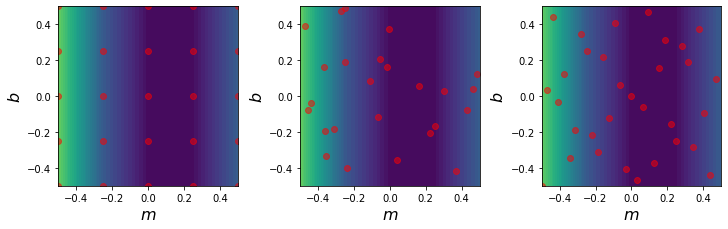

In [25]:
fig = plt.figure(constrained_layout=True,frameon=False,figsize=(10,5))

ax_dict = fig.subplot_mosaic(
    [
        ["grid", "random", "qmc"],
    ],
)

ax_dict["grid"].contourf(mm, bb, loss_grid,levels=np.linspace(0.0,0.5,51))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
#ax_dict["grid"].colorbar()
ax_dict["grid"].scatter(mm,bb,c='r',alpha=0.5)
ax_dict["grid"].axis('scaled')

ax_dict["grid"].set_xlabel('$m$',fontsize=16)
ax_dict["grid"].set_ylabel('$b$',fontsize=16)
#ax_dict["grid"].set_xticks(fontsize=14)
#ax_dict["grid"].set_yticks(fontsize=14)

ax_dict["random"].contourf(mm, bb, loss_grid,levels=np.linspace(0.0,0.5,51))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
#ax_dict["grid"].colorbar()
ax_dict["random"].scatter(m_rand,b_rand,c='r',alpha=0.5)
ax_dict["random"].axis('scaled')

ax_dict["random"].set_xlabel('$m$',fontsize=16)
ax_dict["random"].set_ylabel('$b$',fontsize=16)

ax_dict["qmc"].contourf(mm, bb, loss_grid,levels=np.linspace(0.0,0.5,51))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
#ax_dict["grid"].colorbar()
ax_dict["qmc"].scatter(qmc_samps[:,0],qmc_samps[:,1],c='r',alpha=0.5)
ax_dict["qmc"].axis('scaled')

ax_dict["qmc"].set_xlabel('$m$',fontsize=16)
ax_dict["qmc"].set_ylabel('$b$',fontsize=16)

plt.savefig('lin_reg_gridvsrandom.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

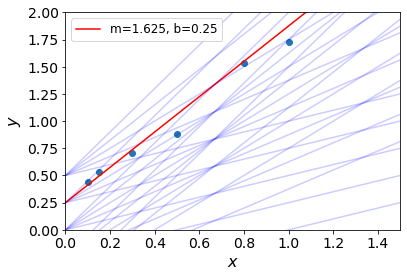

In [10]:
plt.scatter(x,y)
xrange = np.linspace(0,2,20)

for m in m_range:
    for b in b_range:
        labelstring = 'm='+str(m)+', b='+str(b)
        if m==1.625 and b==0.25:
            plt.plot(xrange,m*xrange+b,label=labelstring,c='r',alpha=1.0)
        else:
            plt.plot(xrange,m*xrange+b,c='b',alpha=0.2)

#formating
plt.xlim([0.0,1.5])
plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

plt.savefig('lin_reg_gridsearch_line.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [11]:
def GradientDescentStep(m,b,x,y,learning_rate=0.05):
    L = sse_loss(m*x+b,y)
    dLdm = np.sum(2.0*(m*x**2+b*x-y*x))
    dLdb = np.sum(2.0*(m*x+b-y))
    m += -dLdm*learning_rate
    b += -dLdb*learning_rate
    return m,b,L

In [15]:
m = 0.5 
b = 0.0
loss = sse_loss(m*x+b,y)
m_traj = [m]
b_traj = [b]
loss_traj = [loss]
print(f"i_train\tm\tb\tLoss")
for i_train in range(25):
    #print(i_train,m,b,loss)
    print(f"{i_train}\t{round(m,3)}\t{round(b,3)}\t{round(loss,3)}")

    m,b,loss = GradientDescentStep(m,b,x,y,learning_rate=0.1)
    m_traj.append(m)
    b_traj.append(b)
    loss_traj.append(loss)

i_train	m	b	Loss
0	0.5	0.0	3.86
1	1.045	0.88	3.86
2	0.869	0.393	1.125
3	1.041	0.591	0.419
4	1.031	0.453	0.221
5	1.104	0.486	0.152
6	1.128	0.438	0.119
7	1.17	0.434	0.098
8	1.198	0.411	0.083
9	1.227	0.4	0.071
10	1.251	0.385	0.062
11	1.274	0.375	0.054
12	1.294	0.364	0.048
13	1.312	0.355	0.044
14	1.327	0.346	0.04
15	1.342	0.339	0.037
16	1.354	0.332	0.034
17	1.366	0.326	0.032
18	1.376	0.321	0.031
19	1.385	0.316	0.03
20	1.393	0.312	0.029
21	1.401	0.308	0.028
22	1.407	0.305	0.027
23	1.413	0.302	0.027
24	1.418	0.299	0.026


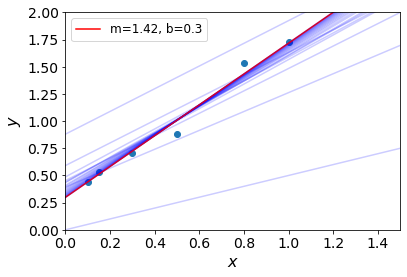

In [16]:
plt.scatter(x,y)
xrange = np.linspace(0,2,20)

for i,m in enumerate(m_traj):
    b = b_traj[i]
    labelstring = 'm='+str(round(m,2))+', b='+str(round(b,2))
    if i==24:
        plt.plot(xrange,m*xrange+b,label=labelstring,c='r',alpha=1.0)
    else:
        plt.plot(xrange,m*xrange+b,c='b',alpha=0.2)

#formating
plt.xlim([0.0,1.5])
plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

plt.savefig('lin_reg_grad_descent_line.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [17]:
m_range = np.linspace(0.5,2.0,20)
b_range = np.linspace(-0.5,1.0,20)
mm,bb   = np.meshgrid(m_range,b_range)
#print(mm.shape,bb.shape)
loss_grid = []#sse_loss(mm*x+bb,y)

for m in m_range:
    for b in b_range:
        L = sse_loss(m*x+b,y)
        #print(m,b,L)
        loss_grid.append(L)
loss_grid = np.array(loss_grid).reshape(20,20)
#print(loss_grid.shape)

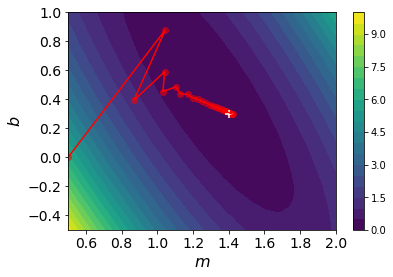

In [18]:
h = plt.contourf(mm, bb, loss_grid,levels=np.linspace(0.0,10,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
plt.colorbar()
plt.scatter(m_traj,b_traj,c='r',alpha=0.5)
plt.plot(m_traj,b_traj,c='r')
plt.scatter([1.4],[0.3],c='w',marker='+',alpha=1.0,s=50)

#plt.axis('scaled')

plt.xlabel('$m$',fontsize=16)
plt.ylabel('$b$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('lin_reg_grad_descent_map.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [19]:
m = 0.5 
b = 0.0
loss = sse_loss(m*x+b,y)
m_traj_2 = [m]
b_traj_2 = [b]
loss_traj_2 = [loss]
print(f"i_train\tm\tb\tLoss")
for i_train in range(25):
    print(f"{i_train}\t{round(m,3)}\t{round(b,3)}\t{round(loss,3)}")
    m,b,loss = GradientDescentStep(m,b,x,y,learning_rate=0.05)
    m_traj_2.append(m)
    b_traj_2.append(b)
    loss_traj_2.append(loss)

i_train	m	b	Loss
0	0.5	0.0	3.86
1	0.772	0.44	3.86
2	0.865	0.538	0.499
3	0.91	0.551	0.263
4	0.943	0.544	0.226
5	0.971	0.531	0.205
6	0.997	0.518	0.186
7	1.022	0.505	0.17
8	1.045	0.493	0.155
9	1.067	0.482	0.141
10	1.088	0.471	0.129
11	1.108	0.461	0.119
12	1.127	0.451	0.109
13	1.144	0.442	0.1
14	1.161	0.433	0.092
15	1.177	0.425	0.085
16	1.192	0.417	0.079
17	1.206	0.409	0.074
18	1.22	0.402	0.069
19	1.233	0.396	0.064
20	1.245	0.389	0.06
21	1.256	0.383	0.056
22	1.267	0.378	0.053
23	1.278	0.372	0.05
24	1.287	0.367	0.047


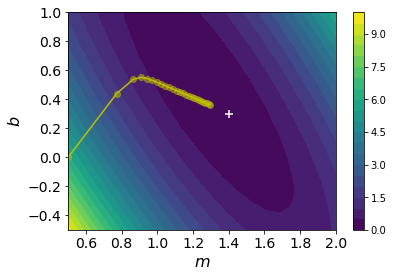

In [20]:
h = plt.contourf(mm, bb, loss_grid,levels=np.linspace(0.0,10,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
plt.colorbar()

plt.scatter(m_traj_2,b_traj_2,c='y',alpha=0.5)
plt.plot(m_traj_2,b_traj_2,c='y')
plt.scatter([1.4],[0.3],c='w',marker='+',alpha=1.0,s=50)

plt.xlabel('$m$',fontsize=16)
plt.ylabel('$b$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('lin_reg_grad_descent_map_slow.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [22]:
#closed form solution:
N = x.shape[0]
num = np.sum(y*x) - (1./N)*np.einsum('i,j->',y,x)
denom = np.sum(x*x) - (1./N)*np.einsum('i,j->',x,x)

m = num/denom
print(f"m={round(m,3)}")

b = np.sum(2*y-2*m*x)/(2*N)
print(f"b={round(b,3)}")

print(f"Loss={round(sse_loss(m*x+b,y),3)}")

m=1.462
b=0.276
Loss=0.024


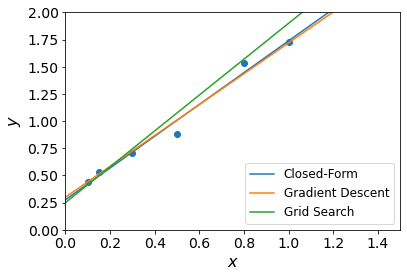

In [23]:
plt.scatter(x,y)
xrange = np.linspace(0,2,20)

plt.plot(xrange,m*xrange+b,label='Closed-Form')
plt.plot(xrange,1.42*xrange+0.3,label='Gradient Descent')
plt.plot(xrange,1.65*xrange+0.25,label='Grid Search')
#plt.plot(xrange,2.0*xrange-0.2,label='m=2.0, b=-0.2')


#formating
plt.xlim([0.0,1.5])
plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

plt.savefig('lin_reg_compare_opt.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [77]:
#Some non-linear data
N_tot = 20
x = np.linspace(0,5,N_tot)
x += 0.05*rng.standard_normal(N_tot)

#y = -1.0*x**3 + 1.*x**2 + 1.4*x + 0.3
y = np.exp(-(x-1.)**2/1.0) - np.exp(-(x-2.5)**2/3.0) + np.exp(-(x-4.0)**2/0.5)
y += 0.1*rng.standard_normal(N_tot)

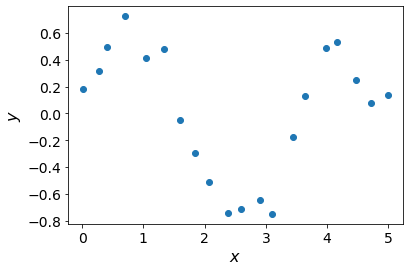

In [78]:

plt.scatter(x,y)

#formating
#plt.xlim([0.0,2])
#plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('lin_reg_data_1d_nonlin.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

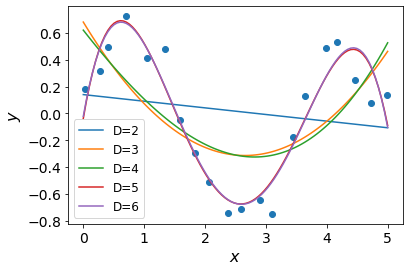

In [79]:
x_range = np.linspace(0,5,100)

plt.scatter(x,y)

#formating
#plt.xlim([0.0,2])
#plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for D in [2,3,4,5,6]: 
    labeltext = 'D='+str(D)
    coeff  = np.polyfit(x, y, deg=D-1)
    y_pred = np.polyval(coeff, x_range)
    plt.plot(x_range,y_pred,label=labeltext)

plt.legend(fontsize=12)
plt.savefig('lin_reg_data_1d_nonlin_fits.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [80]:
def train_val_split(x,y,N_val=5,seed=666):
    np.random.seed(seed) 
    N_tot = x.shape[0]
    N_train = N_tot-N_val
    indices = np.arange(1,N_tot-1)
    np.random.shuffle(indices)
    # make sure that first and last point are included in the training set
    # this avoids diverging behavior of polynomial fits
    indices = np.insert(indices,[0,0],[0,N_tot-1])
#    indices = np.append(indices,[N_tot-1])    
    x_train = x[indices[:N_train]]
    y_train = y[indices[:N_train]]
    x_val   = x[indices[N_train:]]
    y_val   = y[indices[N_train:]]
    return x_train,y_train,x_val,y_val

In [81]:
x_train,y_train,x_val,y_val = train_val_split(x,y,N_val=5)



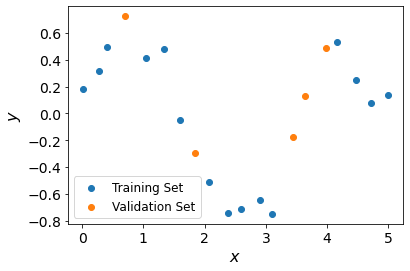

In [82]:
x_range = np.linspace(0,2,)

plt.scatter(x_train,y_train,label="Training Set")
plt.scatter(x_val,y_val,label="Validation Set")

validation_loss = []
training_loss   = []

#perform N_val_runs validation runs
N_val_runs = 10

#formating
#plt.xlim([0.0,2])
#plt.ylim([0.0,2.0])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

reg_dimensions = [2,3,4,5,6,7,8,9,10,12,14]

for D in reg_dimensions: 
    train_loss = 0.
    val_loss   = 0.
    for i_val in range(N_val_runs):
        x_train,y_train,x_val,y_val = train_val_split(x,y,N_val=5,seed=i_val)

        coeff  = np.polyfit(x_train, y_train, deg=D-1)
        y_pred_train = np.polyval(coeff, x_train)
        y_pred_val   = np.polyval(coeff, x_val)

        train_loss += sse_loss(y_pred_train,y_train)
        val_loss   += sse_loss(y_pred_val,y_val)
    training_loss.append(train_loss/N_val_runs)
    validation_loss.append(val_loss/N_val_runs)
        #plt.plot(x_range,y_pred,label=labeltext)

plt.legend(fontsize=12)
plt.savefig('lin_reg_data_1d_nonlin_train_val.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

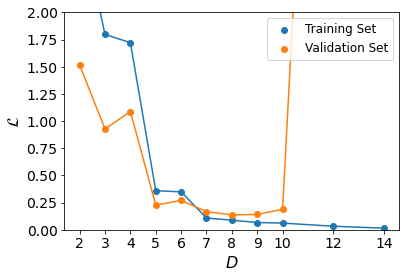

In [83]:
plt.scatter(reg_dimensions,training_loss,label="Training Set")
plt.plot(reg_dimensions,training_loss)

plt.scatter(reg_dimensions,validation_loss,label="Validation Set")
plt.plot(reg_dimensions,validation_loss)

#formating
#plt.xlim([0.0,2])
plt.ylim([0.0,2.0])
plt.xlabel('$D$',fontsize=16)
plt.ylabel('$\mathcal{L}$',fontsize=16)
#plt.yscale('log')
plt.xticks(reg_dimensions,fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=12)
plt.savefig('lin_reg_train_val_loss.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

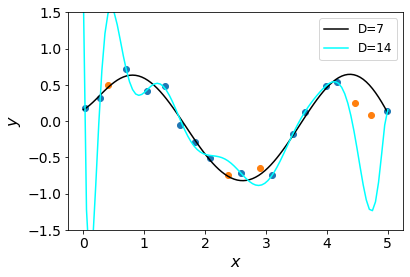

In [84]:
x_range = np.linspace(0,5,100)

plt.scatter(x_train,y_train)
plt.scatter(x_val,y_val)

#formating
#plt.xlim([0.0,2])
plt.ylim([-1.5,1.5])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

colors = ['k','cyan']

for i,D in enumerate([7,14]): 
    labeltext = 'D='+str(D)
    coeff  = np.polyfit(x_train, y_train, deg=D-1)
    y_pred = np.polyval(coeff, x_range)
    plt.plot(x_range,y_pred,label=labeltext,c=colors[i])

plt.legend(fontsize=12)
plt.savefig('lin_reg_over_underfit.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [87]:
def featurize_1D_Gauss(x,xmax=5.,nGauss=16,sigma=1.0):
    N1 = x.shape[0]
    X = []
    x_g = np.linspace(0,xmax,nGauss)
    
    for i in range(N1):
        features = []
        for iD in range(nGauss):
            features.append(np.exp(-((x[i]-x_g[iD])**2)/sigma))
        X.append(features)
    return np.array(X),x_g

In [100]:
sigma = 2.0

X_4,x_g_4 = featurize_1D_Gauss(x_train,xmax=5.,nGauss=7,sigma=sigma)
print(X_4.shape)
c_4 = np.linalg.lstsq(X_4,y_train,rcond=None)[0]

X_14,x_g_14 = featurize_1D_Gauss(x_train,xmax=5.,nGauss=14,sigma=sigma)
print(X_14.shape)
c_14 = np.linalg.lstsq(X_14,y_train,rcond=None)[0]

(15, 7)
(15, 14)


In [101]:
X_4_pred,_ = featurize_1D_Gauss(x_range,xmax=5.,nGauss=7,sigma=sigma)
X_14_pred,_ = featurize_1D_Gauss(x_range,xmax=5.,nGauss=14,sigma=sigma)

y_pred_4 = np.matmul(X_4_pred,c_4)
y_pred_14 = np.matmul(X_14_pred,c_14)


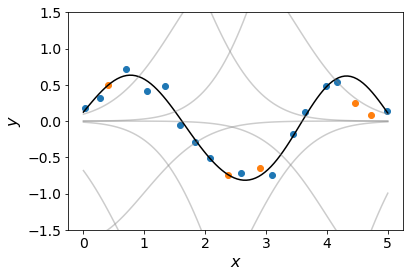

In [111]:
plt.scatter(x_train,y_train)
plt.scatter(x_val,y_val)

#formating
#plt.xlim([0.0,2])
plt.ylim([-1.5,1.5])
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

colors = ['k','cyan']
plt.plot(x_range,y_pred_4,label="nGauss=7",c='k')
#plt.plot(x_range,y_pred_14,label="nGauss=14",c='cyan')
#plt.vlines(x_g_4,-1.5,1.5,color='grey')
for i in range(x_g_4.shape[0]):
    plt.plot(x_range,c_4[i]*np.exp(-(x_range-x_g_4[i])**2/sigma),c='grey',alpha=0.4)
#plt.legend(fontsize=12)
#plt.savefig('lin_reg_over_underfit.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

In [112]:
#Some non-linear data in 2D
N_tot = 1000
x1 = np.linspace(0,5,int(np.sqrt(N_tot)))
x2 = np.linspace(0,5,int(np.sqrt(N_tot)))
                 
xx1,xx2   = np.meshgrid(x1,x2,sparse=False)

c1 = [1.0,1.0]
c2 = [2.5,2.5]
c3 = [4.0,1.0]

    
y =(np.exp(-((xx1-c1[0])**2+(xx2-c1[1])**2)/1.0) - 
    np.exp(-((xx1-c2[0])**2+(xx2-c2[1])**2)/3.0) + 
    np.exp(-((xx1-c3[0])**2+(xx2-c3[1])**2)/0.5))
#print(y.shape)
#y += 0.05*rng.standard_normal(int(np.sqrt(N_tot)))


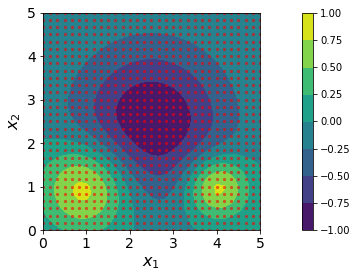

In [114]:
h = plt.contourf(xx1, xx2, y)#,levels=np.linspace(-1.5,1,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
plt.colorbar()
plt.scatter(xx1,xx2,c='r',alpha=0.5,s=5)
plt.axis('scaled')

plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('lin_reg_2D_data.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()


In [115]:
def featurize_2D_Gauss(xx1,xx2,xmax=5.,nGauss=16,sigma=1.0):
    x1 = xx1.flatten()
    x2 = xx2.flatten()
    N1 = x1.shape[0]
    X = []
    x1_g = np.linspace(0,xmax,int(np.sqrt(nGauss)))
    x2_g = np.linspace(0,xmax,int(np.sqrt(nGauss)))
    nGauss = int(np.sqrt(nGauss))**2
    xx1_g,xx2_g = np.meshgrid(x1_g,x2_g,sparse=False)
    x1_g = xx1_g.flatten()
    x2_g = xx2_g.flatten()
    
    for i in range(N1):
        features = []
        for iD in range(nGauss):
            features.append(np.exp(-((x1[i]-x1_g[iD])**2+(x2[i]-x2_g[iD])**2)/sigma))
        X.append(features)
    return np.array(X),xx1_g,xx2_g

In [116]:
X_16,xx1_g_16,xx2_g_16 = featurize_2D_Gauss(xx1,xx2,nGauss=16,sigma=1.0)
print(X_16.shape)
c_16 = np.linalg.lstsq(X_16,y.flatten(),rcond=None)[0]
print(c_16.shape)

X_128,xx1_g_128,xx2_g_128 = featurize_2D_Gauss(xx1,xx2,nGauss=64,sigma=1.0)
print(X_128.shape)
c_128 = np.linalg.lstsq(X_128,y.flatten(),rcond=None)[0]
print(c_128.shape)

(961, 16)
(16,)
(961, 64)
(64,)


In [117]:
y_pred_16 = np.matmul(X_16,c_16)
y_pred_16 = y_pred_16.reshape(y.shape)
y_pred_128 = np.matmul(X_128,c_128)
y_pred_128 = y_pred_128.reshape(y.shape)

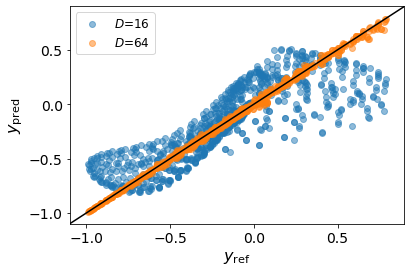

In [128]:
plt.scatter(y,y_pred_16,alpha=0.5,label="$D$=16")
plt.scatter(y,y_pred_128,alpha=0.5,label="$D$=64")
plt.plot(np.linspace(-1.1,0.9,100),np.linspace(-1.1,0.9,100),c='k',alpha=1.0)

#formating
plt.xlim([-1.1,0.9])
plt.ylim([-1.1,0.9])
plt.xlabel('$y_\mathrm{ref}$',fontsize=16)
plt.ylabel('$y_\mathrm{pred}$',fontsize=16)
plt.xticks(np.linspace(-1,0.5,4),fontsize=14)
plt.yticks(np.linspace(-1,0.5,4),fontsize=14)
plt.legend(fontsize=12)

plt.savefig('lin_reg_2D_parity_plot.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

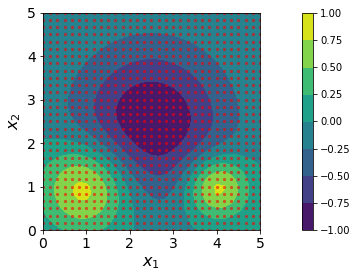

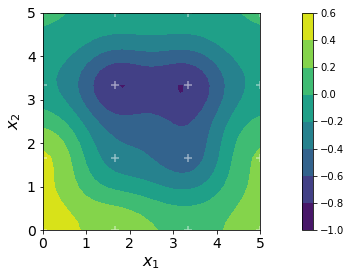

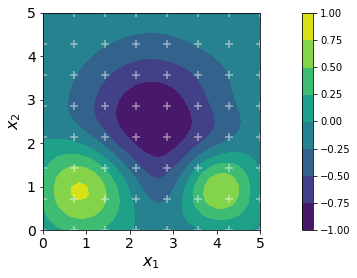

In [75]:
h = plt.contourf(xx1, xx2, y)#,levels=np.linspace(-1.5,1,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
plt.colorbar()
#plt.scatter(xx1,xx2,c='r',alpha=0.5,s=5)
plt.axis('scaled')

plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.savefig('lin_reg_gridsearch.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

h = plt.contourf(xx1, xx2, y_pred_16)#,levels=np.linspace(-1.5,1,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
plt.colorbar()
plt.scatter(xx1_g_16,xx2_g_16,c='w',marker='+',alpha=0.5,s=55)
plt.axis('scaled')

plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.savefig('lin_reg_gridsearch.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

h = plt.contourf(xx1, xx2, y_pred_128)#,levels=np.linspace(-1.5,1,21))#,vmin=0.0,vmax=2.0)#locator=ticker.LogLocator(base=2))
plt.colorbar()
plt.scatter(xx1_g_128,xx2_g_128,c='w',marker='+',alpha=0.5,s=55)
plt.axis('scaled')

plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$x_2$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.savefig('lin_reg_gridsearch.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)
plt.show()

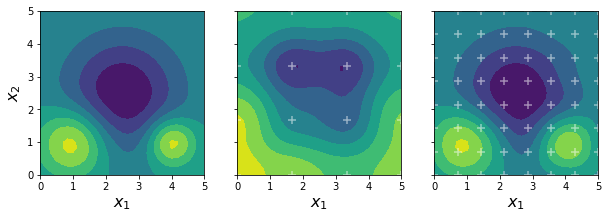

In [140]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(10,10))
ax1.contourf(xx1, xx2, y)
ax1.axis('scaled')

ax2.contourf(xx1, xx2, y_pred_16)
ax2.scatter(xx1_g_16,xx2_g_16,c='w',marker='+',alpha=0.5,s=55)
ax2.axis('scaled')

ax3.contourf(xx1, xx2, y_pred_128)
ax3.scatter(xx1_g_128,xx2_g_128,c='w',marker='+',alpha=0.5,s=55)
ax3.axis('scaled')

ax1.set_xlabel('$x_1$',fontsize=16)
ax1.set_ylabel('$x_2$',fontsize=16)
ax2.set_xlabel('$x_1$',fontsize=16)
ax3.set_xlabel('$x_1$',fontsize=16)

#ax1.set_xticks(fontsize=14)
#ax1.set_yticks(fontsize=14)
#ax2.set_xticks(fontsize=14)
#ax3.set_xticks(fontsize=14)

plt.savefig('lin_reg_2D_models.png',bbox_inches='tight',facecolor='white',edgecolor='white',transparent=False)

plt.show()